In [ ]:
!pip install -U scikit-fuzzy
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

In [ ]:
attendence = ctrl.Antecedent(np.arange(0,13,2), 'attendence')
hoursOfSleep = ctrl.Antecedent(np.arange(0,13,1), 'hoursOfSleep')
academicScore = ctrl.Antecedent(np.arange(0,101,5), 'academicScore')
communicationSkills = ctrl.Antecedent(np.arange(0,101,5), 'communicationSkills')
gpa = ctrl.Consequent(np.arange(0, 101, 0.5), 'gpa')

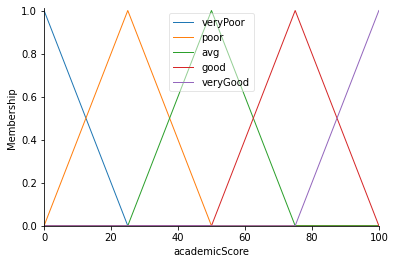

In [ ]:
academicScore['veryPoor'] = fuzz.trimf(academicScore.universe, [0, 0, 25])
academicScore['poor'] = fuzz.trimf(academicScore.universe, [0, 25, 50])
academicScore['avg'] = fuzz.trimf(academicScore.universe, [25, 50, 75])
academicScore['good'] = fuzz.trimf(academicScore.universe, [50, 75, 100])
academicScore['veryGood'] = fuzz.trimf(academicScore.universe, [75, 100, 100])
academicScore.view()

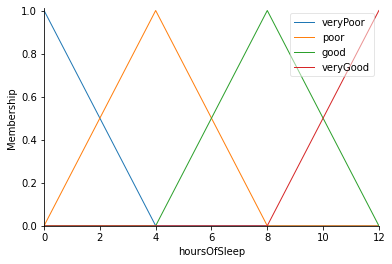

In [ ]:
hoursOfSleep.automf(names = ['veryPoor', 'poor', 'good','veryGood'])
hoursOfSleep.view()

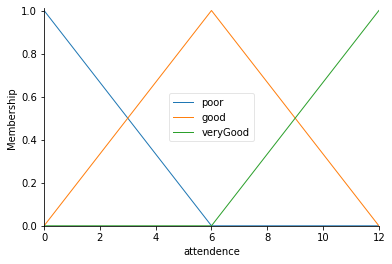

In [ ]:
attendence.automf(names = ['poor', 'good','veryGood'])
attendence.view()

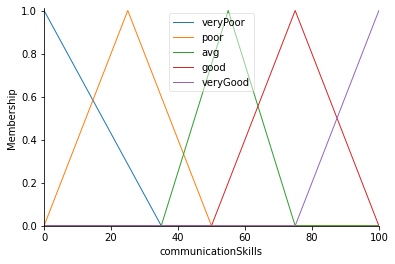

In [ ]:
communicationSkills['veryPoor'] = fuzz.trimf(communicationSkills.universe, [0, 0, 35])
communicationSkills['poor'] = fuzz.trimf(communicationSkills.universe, [0, 25, 50])
communicationSkills['avg'] = fuzz.trimf(communicationSkills.universe, [35, 55, 75])
communicationSkills['good'] = fuzz.trimf(communicationSkills.universe, [50, 75, 100])
communicationSkills['veryGood'] = fuzz.trimf(communicationSkills.universe, [75, 100, 100])
communicationSkills.view()

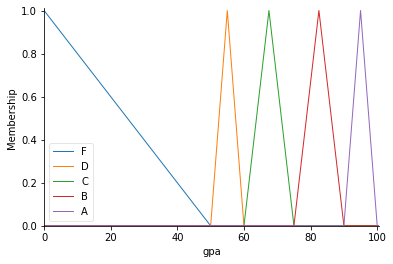

In [ ]:
gpa['F'] = fuzz.trimf(gpa.universe, [0, 0, 50])
gpa['D'] = fuzz.trimf(gpa.universe, [50, 55, 60])
gpa['C'] = fuzz.trimf(gpa.universe, [60, 67.5, 75])
gpa['B'] = fuzz.trimf(gpa.universe, [75, 82.5, 90])
gpa['A'] = fuzz.trimf(gpa.universe, [90, 95, 100])
gpa.view()

In [ ]:
#rules related with very good academic score
rule1 = ctrl.Rule(academicScore['veryGood'] & (hoursOfSleep['good'] | hoursOfSleep['veryGood']) , gpa['A'])
rule2 = ctrl.Rule(academicScore['veryGood'] & (hoursOfSleep['poor'] | hoursOfSleep['veryPoor']) , gpa['B'])
rule3 = ctrl.Rule(academicScore['veryGood'] & (attendence['good'] | attendence['veryGood']) , gpa['A'])
rule4 = ctrl.Rule(academicScore['veryGood'] & (attendence['poor'] & (communicationSkills['veryGood'] | communicationSkills['good'] | communicationSkills['avg'])) , gpa['A'])
rule5 = ctrl.Rule(academicScore['veryGood'] & (attendence['poor'] & (communicationSkills['poor'] | communicationSkills['veryPoor'])) , gpa['B'])
#rules related with good academic score
rule6 = ctrl.Rule(academicScore['good'] & hoursOfSleep['veryGood'] & attendence['veryGood'], gpa['A'])
rule7 = ctrl.Rule(academicScore['good'] & (hoursOfSleep['poor'] | hoursOfSleep['good'] | hoursOfSleep['veryGood']) , gpa['B'])
rule8 = ctrl.Rule(academicScore['good'] & (hoursOfSleep['veryPoor']) , gpa['C'])
rule9 = ctrl.Rule(academicScore['good'] & (attendence['veryGood']) , gpa['A'])
rule10 = ctrl.Rule(academicScore['good'] & ((attendence['good'] | attendence['poor']) & (communicationSkills['veryGood'] | communicationSkills['good'] | communicationSkills['avg'])) , gpa['B'])
rule11 = ctrl.Rule(academicScore['good'] & (attendence['good'] & (communicationSkills['poor'] | communicationSkills['veryPoor'] )) , gpa['B'])
rule12 = ctrl.Rule(academicScore['good'] & (attendence['poor'] & (communicationSkills['poor'] | communicationSkills['veryPoor'] )) , gpa['C'])
#rules related with average academic score
rule13 = ctrl.Rule(academicScore['avg'] & hoursOfSleep['veryGood'] , gpa['B'])
rule14 = ctrl.Rule(academicScore['avg'] & (hoursOfSleep['good'] | hoursOfSleep['poor']) , gpa['C'])
rule15 = ctrl.Rule(academicScore['avg'] & hoursOfSleep['veryPoor'] , gpa['D'])
rule16 = ctrl.Rule(academicScore['avg'] & (attendence['veryGood'] | communicationSkills['veryGood']) , gpa['B'])
rule17 = ctrl.Rule(academicScore['avg'] & (attendence['good']  | communicationSkills['good'] ), gpa['C'])
rule18 = ctrl.Rule(academicScore['avg'] & (attendence['poor'] & (communicationSkills['veryGood'] | communicationSkills['good'])) , gpa['C'])
rule19 = ctrl.Rule(academicScore['avg'] & (attendence['poor'] & (communicationSkills['poor'] | communicationSkills['veryPoor'] | communicationSkills['avg'])) , gpa['D'])
#rules related with poor academic score
rule19 = ctrl.Rule(academicScore['poor'] & hoursOfSleep['veryGood'] , gpa['C'])
rule20 = ctrl.Rule(academicScore['poor'] & (hoursOfSleep['poor'] | hoursOfSleep['good'] | hoursOfSleep['veryGood']) , gpa['D'])
rule21 = ctrl.Rule(academicScore['poor'] &  hoursOfSleep['veryPoor'] , gpa['F'])
rule22 = ctrl.Rule(academicScore['poor'] & attendence['veryGood'] , gpa['C'])
rule23 = ctrl.Rule(academicScore['poor'] & (attendence['good'] & (communicationSkills['veryGood'] | communicationSkills['good'] )) , gpa['D'])
rule24 = ctrl.Rule(academicScore['poor'] & attendence['good'] & communicationSkills['veryPoor']  , gpa['F'])
rule25 = ctrl.Rule(academicScore['poor'] & attendence['poor'] , gpa['F'])
#rules related with very poor academic score
rule26 = ctrl.Rule(academicScore['veryPoor'] &  hoursOfSleep['veryGood'] , gpa['D'])
rule27 = ctrl.Rule(academicScore['veryPoor'] & hoursOfSleep['good'] | (hoursOfSleep['poor'] | hoursOfSleep['veryPoor']) , gpa['F'])
rule28 = ctrl.Rule(academicScore['veryPoor'] & communicationSkills['veryGood'] & attendence['veryGood'], gpa['D'])
rule29 = ctrl.Rule(academicScore['veryPoor'] & (communicationSkills['poor'] | communicationSkills['veryPoor'] |  communicationSkills['good'] |communicationSkills['veryGood'] | communicationSkills['avg']) , gpa['F'])
rule30 = ctrl.Rule(academicScore['veryPoor'] & (attendence['poor'] | attendence['good'] | attendence['veryGood']) , gpa['F'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc8c5888950>)

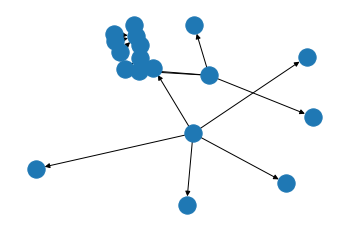

In [ ]:
rule1.view()

GPA= 67.5


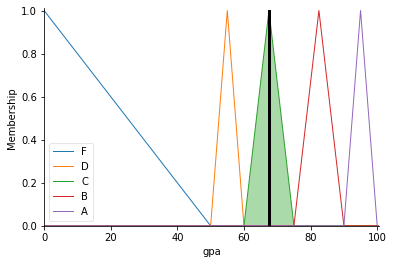

In [ ]:
ctrl_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30])
GPA = ctrl.ControlSystemSimulation(ctrl_system)
GPA.input['attendence'] = 6
GPA.input['communicationSkills'] = 50
GPA.input['hoursOfSleep'] = 8
GPA.input['academicScore'] = 50
GPA.compute()

gpa.view(sim=GPA)
print("GPA=",GPA.output['gpa'])

GPA= 94.99999999999999


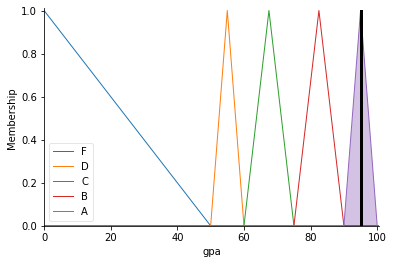

In [ ]:
GPA2 = ctrl.ControlSystemSimulation(ctrl_system)
GPA2.input['attendence'] = 12
GPA2.input['communicationSkills'] = 100
GPA2.input['hoursOfSleep'] = 12
GPA2.input['academicScore'] = 100
GPA2.compute()

gpa.view(sim=GPA2)
print("GPA=",GPA2.output['gpa'])

GPA= 82.50000000000001


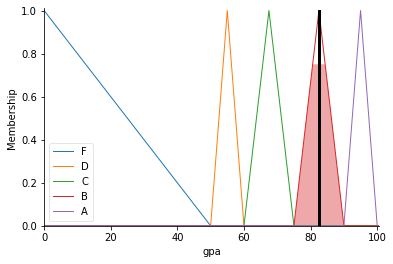

In [ ]:
GPA3 = ctrl.ControlSystemSimulation(ctrl_system)
GPA3.input['attendence'] = 6
GPA3.input['communicationSkills'] = 60
GPA3.input['hoursOfSleep'] = 10
GPA3.input['academicScore'] = 75
GPA3.compute()

gpa.view(sim=GPA3)
print("GPA=",GPA3.output['gpa'])

GPA= 53.10067928190204


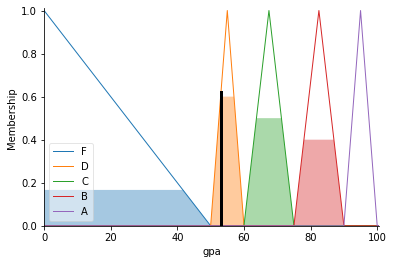

In [ ]:
GPA4 = ctrl.ControlSystemSimulation(ctrl_system)
GPA4.input['attendence'] = 5
GPA4.input['communicationSkills'] = 80
GPA4.input['hoursOfSleep'] = 10
GPA4.input['academicScore'] = 35
GPA4.compute()

gpa.view(sim=GPA4)
print("GPA=",GPA4.output['gpa'])

GPA= 31.500000000000018


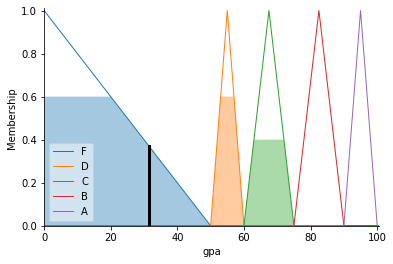

In [ ]:
GPA5 = ctrl.ControlSystemSimulation(ctrl_system)
GPA5.input['attendence'] = 4
GPA5.input['communicationSkills'] = 80
GPA5.input['hoursOfSleep'] = 12
GPA5.input['academicScore'] = 10
GPA5.compute()

gpa.view(sim=GPA5)
print("GPA=",GPA5.output['gpa'])